In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image

In [2]:
img_df = pd.read_csv("./train.csv")

In [3]:
# 조각낸 이미지와 수정된 이미지를 저장할 폴더 생성
# 최초 1회 실행, 이후는 이미 존재하기에 건너 뜀
try:
    os.mkdir("./check")
    os.mkdir("./img")
except:
    pass

In [4]:
# 불러올 이미지의 경로
img_path = img_df["img_path"][0]

In [5]:
image = Image.open(img_path)

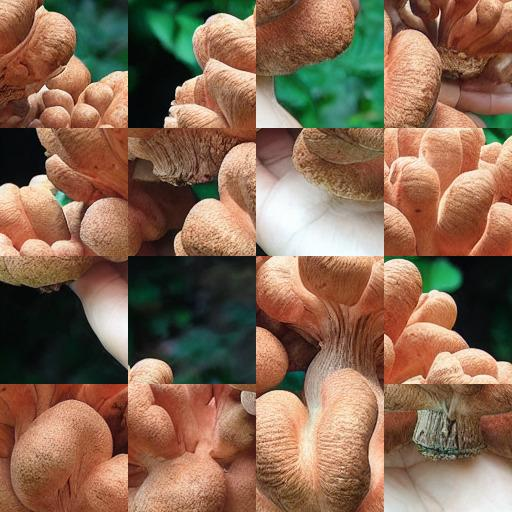

In [6]:
image

In [7]:
# 4*4로 자르기 위해 비율을 구하고 저장
img_w = image.width
img_h = image.height

w_rate = img_w/4
h_rate = img_h/4

# 자를 때 시작점을 지정해 줘야 하기에 0부터 시작
w_size_arr = [0]
h_size_arr = [0]

for i in range(1,5):
    w_size = i * w_rate
    h_size = i * h_rate
    
    w_size_arr.append(w_size)
    h_size_arr.append(h_size)

In [9]:
count = 0
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        # 이미지를 4*4로 자르고 저장
        resize_img = image.crop((w_size_arr[j], h_size_arr[i], w_size_arr[j+1], h_size_arr[i+1]))
        num = img_df.loc[0][2+count]
        count += 1
        resize_img.save(f"./check/img{num}.jpg")

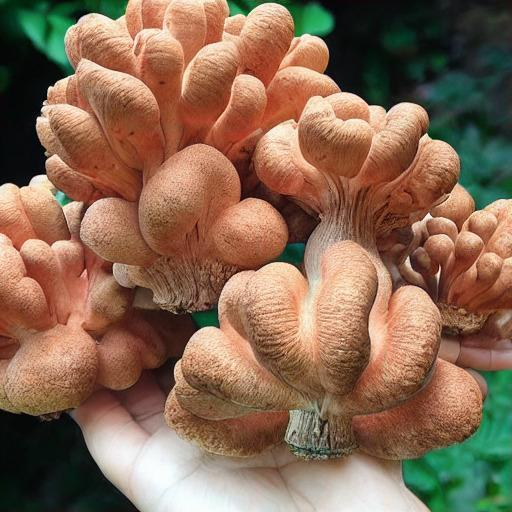

In [9]:
# 병합할 이미지의 기본틀 만들기
merged = Image.new('RGB', (img_w, img_h)) # "RGB" 대신 "L"이 들어가면 흑백이 된다.

count = 0
save_cnt = 0
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        count += 1
        # 2. 이미지 불러오기
        im = Image.open(f'./check/img{count}.jpg')

        # 3. 이미지 붙여넣기
        merged.paste(im, (int(w_rate) * j, int(h_rate) * i))

# 4. 병합한 이미지 저장하기
save_cnt += 1
merged.save(f'./img/img{save_cnt}.jpg')
Image.open(f'./img/img{save_cnt}.jpg')